In [2]:
import sys
import os
sys.path.insert(0, '/Users/lerinalaluf/Desktop/SIP_2021/kaepora/src')
os.chdir('/Users/lerinalaluf/Desktop/SIP_2021/kaepora/src')

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
import kaepora as kpora
import matplotlib.pyplot as plt

In [8]:
spectra_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source > 1 and dm15_source < 1.2) or (dm15_from_fits > 1 and dm15_from_fits < 1.2)) and si_v0 < -8500"]

In [9]:
spec_array = kpora.grab(spectra_query[0], db_file = '../data/kaepora_v1_DEV.db')

159 Total Spectra found
159 spectra of SNe that have host reddening corrections
Arrays cleaned


In [10]:
data = np.loadtxt("../../si_v0<-8500_sequence")

In [11]:
data = data.astype(int)
print data

file_name_array = []
k=0

while k < len(data):
    farray = []
    for i in data[k:k+len(data)/10]:
        farray.append(spec_array[i].filename)
    file_name_array.append(farray)
    k += len(data)/10

print file_name_array

[ 16  79  78 120  65  38  39 112 110  40 109 111 103  49  26  48  27   4
  46  99  14 100  20  88  41  47  76  28  15  89  25  59   3  62  44  24
  61  45  23  43  87  60  22  35  86  19   2   7  85  36  17 101  80  64
   1   6   5  83 124 123 125  82  84 122 130  81  58 117  37  34 121  33
  57 119  53  51  75  18   0 129 128 116  68  97  52  55 106  11 107  69
  96 115  10  74 127 108 118  67  70 114  98  56  54 104 113  91  71  92
  66   9  31  63 105  50  42  30  32 126  73   8  77  90  94  29  13  95
  93 102  12  72  21]
[[u'sn2006or-20061201.530-ui.flm', u'sn2005cf-20050615.24-fast.flm', u'sn2005cf-20050614.31-fast.flm', u'SN08bq_080407_b01_DUP_WF.dat', u'sn2003du-20030508.30-fast.flm', u'sn1998aq-19980429.26-fast.flm', u'sn1998aq-19980430.24-fast.flm', u'SN06os_061122_b01_DUP_WF.dat', u'SN06ax_060402_b01_DUP_WF.dat', u'sn1998bu-19980517.15-fast.flm', u'SN06ax_060331_b01_DUP_WF.dat', u'SN06hx_061010_b01_DUP_WF.dat', u'SN05bg_050412_b01_DUP_WF.dat'], [u'sn1999gd-19991208.52-fast.

In [12]:
query_strings = []

for files in file_name_array:
    i = 1
    string = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where "
    for file in files:
        string += "filename = '%s'"% (file)
        if i < len(files):
            string += ' or '
        i += 1
    query_strings.append(string)

print query_strings

[u"SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename = 'sn2006or-20061201.530-ui.flm' or filename = 'sn2005cf-20050615.24-fast.flm' or filename = 'sn2005cf-20050614.31-fast.flm' or filename = 'SN08bq_080407_b01_DUP_WF.dat' or filename = 'sn2003du-20030508.30-fast.flm' or filename = 'sn1998aq-19980429.26-fast.flm' or filename = 'sn1998aq-19980430.24-fast.flm' or filename = 'SN06os_061122_b01_DUP_WF.dat' or filename = 'SN06ax_060402_b01_DUP_WF.dat' or filename = 'sn1998bu-19980517.15-fast.flm' or filename = 'SN06ax_060331_b01_DUP_WF.dat' or filename = 'SN06hx_061010_b01_DUP_WF.dat' or filename = 'SN05bg_050412_b01_DUP_WF.dat'", u"SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename = 'sn1999gd-19991208.52-fast.flm' or filename = 'sn1996ab-19960522.37-fast.flm' or filename = 'sn1999cl-19990614.18-fast.flm' or filename = 'sn1996bl-19961018.18-fast.flm' or filename = 'sn2001da-20010716-ui-corrected.flm' or filename = 'sn1999cl-19990

In [13]:
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(query_strings, boot=False, medmean=1, gini_balance=True, verbose=False, shape_param='dm15')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename = 'sn2006or-20061201.530-ui.flm' or filename = 'sn2005cf-20050615.24-fast.flm' or filename = 'sn2005cf-20050614.31-fast.flm' or filename = 'SN08bq_080407_b01_DUP_WF.dat' or filename = 'sn2003du-20030508.30-fast.flm' or filename = 'sn1998aq-19980429.26-fast.flm' or filename = 'sn1998aq-19980430.24-fast.flm' or filename = 'SN06os_061122_b01_DUP_WF.dat' or filename = 'SN06ax_060402_b01_DUP_WF.dat' or filename = 'sn1998bu-19980517.15-fast.flm' or filename = 'SN06ax_060331_b01_DUP_WF.dat' or filename = 'SN06hx_061010_b01_DUP_WF.dat' or filename = 'SN05bg_050412_b01_DUP_WF.dat'
13 Total Spectra found
0 flagged spectra removed 13 spectra left
0 spectra of peculiar Ias removed 13 spectra left
13 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
10 total SNe
removed spectra of SNe with A_V > 2.0
Using 13 spectra of 10 SNe
Gini balancing...
Balanc

13 Total Spectra found
0 flagged spectra removed 13 spectra left
0 spectra of peculiar Ias removed 13 spectra left
13 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
11 total SNe
removed spectra of SNe with A_V > 2.0
Using 13 spectra of 11 SNe
Gini balancing...
Balanced after 9 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename = 'SN07af_070314_b01_DUP_BC.dat' or filename = 'sn2007af-20070315.39-fast.flm' or filename = 'sn2004bg-20040411.39-fast.flm' or filename = 'sn2007af-20070317.42-fast.flm' or filename = 'sn2003du-20030509.29-fast.flm' or filename = 'sn2005ag-20050212.596-br.flm' or filename = 'sn1997bp-19970411.30-fast.flm' or filename = 'sn2002fk-20021003.45-fast.flm' or filename = 'SN05hc_051024_b01_MGH_BC.dat' or filename = 'sn2001az-20010430.40-fast.flm' or filename = 'sn1998bu-19980520.15-fast.flm' or filename = 'sn1997bp-19970410.27-fast.flm' or filename = 'sn199

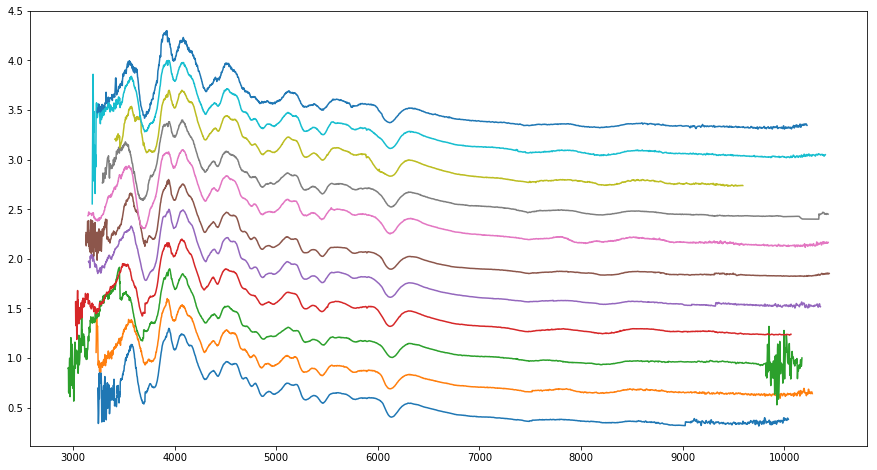

In [14]:
k = 0.3

plt.figure(figsize = [15, 8])

for composite in composites:
    plt.plot(composite.wavelength, composite.flux + k)
    k += 0.3

plt.show()